<a href="https://colab.research.google.com/github/esfandiaryfard/machine-learning/blob/main/Gianluigi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
l = [x for x in range(0,5)]
print ("l is a list",l)
x = torch.tensor(l)
print("x is a tensor:\n",x)  #tensor is a multidimensional array

l is a list [0, 1, 2, 3, 4]
x is a tensor:
 tensor([0, 1, 2, 3, 4])


In [ ]:
y= torch.ones(2,3,dtype=torch.float16) * 1.5 #moltiplito tutto per 1.5
y

tensor([[1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000]], dtype=torch.float16)

In [ ]:
y.shape

torch.Size([2, 3])

In [ ]:
#we define a tensor and then we can move on numpy VEDI CODICE


In [ ]:
#tensor manipulation
y = torch.ones(2,3) # we have a tensor of 2 * 3 dimension
y.shape
y_unsqueezed = y.unsqueeze(dim = 0) # qui sto aggiungendo una nuova dimensione, dove? nella posizione 0
y_unsqueezed.shape  # 3D tensor  now we have a third dimension tensor 


# squeeze by default remove the dimensions of 1 because they are meaningless (or they can be)
# la funzione squeeze applica soltanto modifiche temporali, se voglio aggiornare la variabile applico squeeze_ 

torch.Size([1, 2, 3])

In [ ]:
# its better use reshape if we want to reshape the tensor, posso applicare anche una view ma crea problemi 

In [ ]:
#permutation 
# y= x.permute(1,2,3) in questo caso sto dicendo: metti in posizione 1 - 1 , in posizione 2 - 2 , in pos 3 - 3 . quindi non cambia nulla qui

In [ ]:
#concatenation RICORDA che se voglio concatenare 2 tensor, le dimensioni devono essere le stesse
x= torch.rand(2,3)
y= torch.cat([x,x,x],0)   #praticamente concateni una 2 * 3 --> 3 volte
y 

tensor([[0.5406, 0.8321, 0.1076],
        [0.6255, 0.2910, 0.9628],
        [0.5406, 0.8321, 0.1076],
        [0.6255, 0.2910, 0.9628],
        [0.5406, 0.8321, 0.1076],
        [0.6255, 0.2910, 0.9628]])

In [ ]:
# Esempio creazione di un modello AND in cui ritorna 1 solo se entrambi sono 1
num_samples = 5000    #sotto size rappresenta la dimensione dei dati, ovvero 5000 righe e 2 colonne che possono assumere solo 0 e 1
data = torch.randint (low= 0 , high=2, size= (num_samples,2), dtype= torch.float32 )  # creo solo valori con minimo 0 e max 2 non incluso quindi 1
data  # ho generato 5000 righe e 2 colonne con valori random 0 - 1


tensor([[0., 0.],
        [1., 0.],
        [1., 1.],
        ...,
        [1., 0.],
        [1., 1.],
        [1., 0.]])

In [ ]:
labels = (data.sum(dim=1) == 2).to(torch.float32) # in generale se la somma dei due valori è uno tornami 1 altrimenti 0
#labelsprova = data.sum(dim=1) ==2   # questo in pratica ritorna un true/ false condition e dopo attraverso to(torch.float32) viene convertito in float
# come lavora? IN SOSTANZA è UN IF :esso fa la somma di dim=1 ovvero della prima dimensione che corrisponde alle righe, quindi per ogni riga fa la sommatoria delle 2 colonne
# dal momento che siamo nel AND e quindi l'output è 1 solo se entrambi i valori X1 e X2 sono 1, per avere output 1 la sommma deve essere NECESSARIAMENTE 2
# e quindi se la somma delle due colonne in ogni riga mi da 2 ALLORA MI DAI TRUE ALTRIMENTI FALSE e questo TRUE viene poi trasformato in floating in cui true=1

labels

tensor([0., 0., 1.,  ..., 0., 1., 0.])

In [ ]:
# Print the first 10 elements of data and their corresponding labels
for i in range(10):
  print(f"x: {data[i]}, label: {labels[i]}")

x: tensor([0., 0.]), label: 0.0
x: tensor([1., 0.]), label: 0.0
x: tensor([1., 1.]), label: 1.0
x: tensor([0., 1.]), label: 0.0
x: tensor([0., 0.]), label: 0.0
x: tensor([1., 0.]), label: 0.0
x: tensor([1., 1.]), label: 1.0
x: tensor([0., 0.]), label: 0.0
x: tensor([0., 1.]), label: 0.0
x: tensor([0., 0.]), label: 0.0


In [ ]:
# Add some random noise to each sample e quindi FOR EACH POINT fai questo
data += 0.1 * torch.randn(data.shape)
# torch.randn è una funzione di torch che prende valori random da una distribuzione with mean 0 and sd=1, 

In [ ]:
for i in range(10):
  print(f"x: {data[i]}, label: {labels[i]}")

x: tensor([-0.1068, -0.0222]), label: 0.0
x: tensor([ 1.0082, -0.0986]), label: 0.0
x: tensor([1.0716, 1.1274]), label: 1.0
x: tensor([-0.0296,  1.0269]), label: 0.0
x: tensor([-0.0671,  0.1359]), label: 0.0
x: tensor([ 1.2463, -0.0045]), label: 0.0
x: tensor([0.9488, 0.8982]), label: 1.0
x: tensor([-0.1006, -0.0277]), label: 0.0
x: tensor([0.0693, 0.8169]), label: 0.0
x: tensor([-0.0441, -0.0831]), label: 0.0


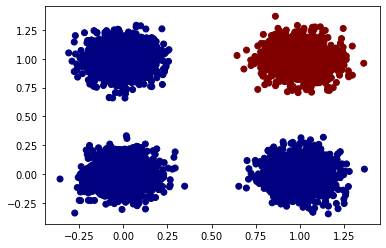

In [ ]:
# Plot the AND dataset i BLUE sono gli zeroes, senza noise abbiamo solo 4 punti
import matplotlib.pyplot as plt
plt.scatter(data[:,0], data[:,1], c = labels, cmap = "jet")
plt.show()
# possiamo vedere che la classificazione puo essere fatta mediante una LINEA che permette di separare i valori in blue da quelli in rosso

In [ ]:
# qui genero soltanto i dati, non è il Dataset, per crearlo devo creare una classe Dataset che faremo dopo
def generate_and_dataset(num_samples):   #ho definito una UNICA FUNZIONE per creare il dataset AND LOGIC inserendo tutte le funzioni definite prima
  data = torch.randint(low = 0 , high = 2, size=(num_samples,2), dtype=torch.float32) #definito prima
  labels = (data.sum(dim=1) == 2).to(torch.float32)    #definito prima
  data += 0.1 * torch.randn(data.shape)    #definito prima
  return data, labels
  #passo alla funzione un campione di 5000 elementi e mi ritorini i dati e le labels

PyTorch provide us the class `Dataset`, with which we can use existing datasets, or create a new one. 

If we want to create our custom Dataset, we must implement three functions:
*   __init__ : it is run when instantiating the Dataset object.
*   __len__ : returns the number of samples of our dataset.
*   __getitem__ : returns a sample of the dataset given an index. 


In [ ]:
from torch.utils.data import Dataset
# qui creo la CLASSE (non il dataset che poi creerò dopo)
class ANDDataset(Dataset):   #qui praticamente ho creato un OGGETTO Dataset che chiamo ANDDataset che ha come parametri SELF ed il num di campione
  def __init__(self, num_samples = 5000):
    super().__init__()  # it's a standard when we create a Class Object

    self.size = num_samples  # Dataset ha dimensione 5000 con self.size
    self.data, self.labels = generate_and_dataset(self.size)   # questi valori sono OBBLIGATORI in quanto corrispondono ai parametri di INPUT ed alla TARGET VARIABLE
      #quindi ogni volta che ho un dataset (che sto creando)avrò un self.data ed un self.labels

      
  def __len__(self):  # per essere un dataset in PYTORCH devo definire anche questa funzione in cui torno la size dell'Oggetto 
    # Number of data point we have.
    return self.size # len(self.data)

  def __getitem__(self, idx):    # è un'altra parte che deve essere scritta esattamente in questo modo, riceve self che è l'oggetto, mentre idx punta ad ogni elemento del dataset
    # Return the idx-th data point of the dataset
    # If we have multiple things to return (e.g., data point and label), we can return them as tuple
    data_point = self.data[idx]    # quindi idx mi ritorna l'elemento iesimo
    data_label = self.labels[idx]   # ed il label iesimo
    return data_point, data_label

In [ ]:
and_dataset = ANDDataset(num_samples = 5000) #qui richiamo la classe ANDDataset per creare il DATASET passandogli l'unico parametro che richiede
# da notare che self è presente in ogni classe e non rappresenta un parametro dell'oggetto
# quindi and_dataset rappresenterà il mio dataset : IL MIO PYTORCH DATASET
len(and_dataset) # this instruction calls the __len__ function e possiamo vedere la dimensione del dataset (è solo un esempio per vedere se funziona)

5000

In [ ]:
# We can use and_dataset similarly to an array QUI STO FACENDO VEDERE CHE posso richiamare il dataset come un array 
# Print the first element of the dataset  
point, label = and_dataset[0]  # questo avviene attraverso la funzione get_item che torna 2 elementi
print("Point:", point)
print("Label:", label)

Point: tensor([-0.0805, -0.0708])
Label: tensor(0.)


The class torch.utils.data.DataLoader represents a Python iterable over a dataset. The data loader communicates with the dataset using the function getitem, and stacks its outputs as tensors over the first dimension to form a batch. In contrast to the dataset class, we usually don’t have to define our own data loader class, but can just create an object of it with the dataset as input. We can configure our data loader with the following input arguments:

- batch_size: number of samples to stack in a batch
- shuffle: if True, the data is returned in a random order. This is important during training for introducing stochasticity.
- drop_last: if True, the last batch is dropped in case it is smaller than the specified batch size. This occurs when the dataset size is not a multiple of the batch size.

In [ ]:
from torch.utils.data import DataLoader  #data loader permette di leggere i dati, che non sono letti 1-1 ma di solito sono raggruppati in Batch, ovvero in 
# campioni di n elementi 

#avendo creato la funzione ANDDataset posso passare un campione che voglio per generarmi il training ed il test
dset_train = ANDDataset(num_samples = 5000)  #qui creo il training set
dset_test = ANDDataset(num_samples = 500)    #qui creo il test set

dloader_train = DataLoader(dset_train, batch_size = 50, shuffle=True) #DataLoader prende come input ALMENO un input: dset_train, e poi qui anche batch_size e shuffle
dloader_test = DataLoader(dset_test, batch_size = 50)  #shuffle permette di rimescolare i dati per creare i batch, nel test non ha senso avere shuffle= true

In [ ]:
# Get the first batch from the data_loader
batch = next(iter(dloader_train)) #qui "iter" crea un'iterazione del data loader, mentre NEXT permette di leggere il batch successivo
points, labels = batch
print(points.shape)  #vedo che è un batch di 50 elementi e due colonne x1 ed x2
print(labels.shape) #qui avrò solo 50 righe che rappresentano le labels
print(labels[0]) # qui stampo il primo label, 1 di 50 elementi del batch

torch.Size([50, 2])
torch.Size([50])
tensor(0.)


In [ ]:
# STIAMO SIMULANDO UN'ITERAZIONE SUI BATCH : OGNI VOLTA PRENDE UN BATCH E FAI QUALCOSA (in questo caso non fa nulla)
# QUESTA OPERAZIONE è CIò CHE AVVIENE NELLE "EPOCHS"
# An example of how to iterate over a dataset with a DataLoader 
from tqdm import tqdm  #tqdm viene usato solo per generare un BAR progressiva
# if used with an iterable, tqdm shows a progress bar when we execute the code.

import time
# The time module provides various time-related functions.

for idx, batch in enumerate(tqdm(dloader_train)):
  time.sleep(0.1) # as instance, in this for loop we can put the training code

100%|██████████| 100/100 [00:10<00:00,  9.59it/s]


**Model Creation**




In Pytorch, a neural network is made by modules. A module can contain other modules. A neural network is considered a module it self.

To create a neural network, we create a class that inherits from:

In [ ]:
torch.nn.Module


torch.nn.modules.module.Module

In [ ]:
import torch.nn as nn 
import torch.nn.functional as F
class MyModule(nn.Module):

  #Constructor
  def __init__(self):  #questa è la mia classe (come prima ho creato la classe AND)

    super().__init__()  #come prima creo una funzione "_init_"  che crea il modello
    # Define some attributes of the module

  #Forward  questa funzione invece definisce COME I DATI SCORRONO da un layer ad un altro, dato un input COME essi vanno ATTRAVERSO LA MIA RETE
  def forward(self, x): 
    # Perform some computation
    return x

In the init function we usually define the parameters and the layers of the module, or we define other modules that are used in the forward function.

Training a neural network happens in two steps:

forward propagation: in the forward prop, the neural network makes it best guess about the correct output. It runs the input data through of its layers to make this guess.
backward propagation: in the backward prop, the neural network adjusts its parameters proportionate to the error in its guess.
The forward function is where the computation of the model happens. The backward calculation is done "automatically".

In [ ]:
class SimpleModel(nn.Module):
  # Constructor
  def __init__(self, input_dim, output_dim):
    super(SimpleModel, self).__init__()
    self.layer1 = torch.nn.Linear(in_features=input_dim, out_features=output_dim)
# qui creo 1 livello con 1 neurone, torch.nn.Linear permette di creare una classificazione Lineare, gli passo: "quanti input e quanti output devo avere"
  
  #se avessi avuto piu livelli ad esempio 2:
  # creavo un self.layer2=.... e poi sotto:
  #forward 
  def forward(self, x):
    output = self.layer1(x) # Computes sum(w*x + b) questo definisce quanto entra nel neurone: il peso di x + il bias, quindi come abbiamo detto 
    #forward definisce cosa passa nel flusso: prendi il mio input (che è x ) e lo fai passare dal layer1

    #creando 2 layer
    #avrei dovuto mettere :
    #x = self.layer1(x)
    #output=self.layer2(x)
    return output 

In [ ]:
# Create the model
net = SimpleModel(input_dim = 2, output_dim = 1) # net contiene il modello
# nel nostro esempio abbiamo solo 1 neurone, ecco perche è sufficiente una sola rete con 2 input ed 1 output
# NOTA: SE AVESSIMO AVUTO PIU LIVELLI AVREMMO DOVUTO CREARE PIU NET, NET1,NET2,...

In [ ]:
# Print the model
print(net)

SimpleModel(
  (layer1): Linear(in_features=2, out_features=1, bias=True)
)


**The Optimizer**

For updating the parameters of the net, PyTorch provides the **package torch**.optim. For now we use the Stocasting Gradient Descent, that updates the parameters by multiplying the gradients with a small constant, called **learning rate**.

In [ ]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr = 0.01)  #.parameters permette di considerare i parametri in cui the Optimizer deve aggiornare i PESI

The optimizer provides us two very usefull functions:

* optimizer.step() updates the model parameters (weights) based on the gradient 
values.
* optimizer.zero_grad() sets the gradients of all paramters to zero.


**The Loss**
For binary classification, we ca use the Binary Cross Entropy (BCE) Loss.

As BCE loss expects all inputs are in the range  [0,1]  , we will use BCEWithLogitsLoss, which first applies a sigmoid function to the inputs.

In [ ]:
# Define a loss function criterion== loss
criterion = nn.BCEWithLogitsLoss()  #BINARY CROSS ENTROPY with logits for binary classification,

**Train the net**

In [ ]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs = 100):
    history_loss = []  #questo è per salvare
    
    model.train()
    # Training loop
    for epoch in range(num_epochs):   
        # Initialize epoch variables
        sum_loss = 0
      
        for data_inputs, data_labels in data_loader:  #data loader crea i batches, ecco perche itero qui: data loadre: give me the x and the y
            ## Step 1: Run the model on the input data
            preds = model(data_inputs) # This will execute the forward function of model class, QUINDI QUESTO RICHIAMA LA FUNZIONE FORWARD
            preds = preds.squeeze(dim=1) # Output shape is [Batch size, 1], but we want [Batch size]
            
            #GIVEN THE PREDICTION WE CALCULATE THE LOSS
            ## Step 2: Calculate the loss
            loss = loss_module(preds, data_labels)
            
            sum_loss += loss.item()
            
            ## Step 3: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()  #CANCELLO IL GRADIENTE
            # Perform backpropagation
            loss.backward()   #APPLICO LA BACKPROP
            
            ## Step 4: Update the parameters
            optimizer.step()   #AGGIORNO I PESI
            
        # Compute epoch loss    
        epoch_loss = sum_loss / len(data_loader)
        
        # Update history
        history_loss.append(epoch_loss)
        
        # Print info
        print(f"Epoch {epoch+1}: TrL= {epoch_loss}")
        
    # Plot the loss
    plt.title("Loss")
    plt.plot(history_loss, label="train")
    plt.legend()
    plt.show()



Epoch 1: TrL= 0.8347820192575455
Epoch 2: TrL= 0.7717165970802307
Epoch 3: TrL= 0.7265711176395416
Epoch 4: TrL= 0.6907790052890778
Epoch 5: TrL= 0.6604760658740997
Epoch 6: TrL= 0.6337206315994263
Epoch 7: TrL= 0.6095507127046585
Epoch 8: TrL= 0.587420048713684
Epoch 9: TrL= 0.5669839736819268
Epoch 10: TrL= 0.5480331027507782
Epoch 11: TrL= 0.5304023373126984
Epoch 12: TrL= 0.5139734360575676
Epoch 13: TrL= 0.49862923443317414
Epoch 14: TrL= 0.4842733827233314
Epoch 15: TrL= 0.4708196470141411
Epoch 16: TrL= 0.4582023876905441
Epoch 17: TrL= 0.4463350060582161
Epoch 18: TrL= 0.4351579225063324
Epoch 19: TrL= 0.4246135574579239
Epoch 20: TrL= 0.4146585485339165
Epoch 21: TrL= 0.4052343407273293
Epoch 22: TrL= 0.3963152533769608
Epoch 23: TrL= 0.38784037709236147
Epoch 24: TrL= 0.37979142636060714
Epoch 25: TrL= 0.3721350434422493
Epoch 26: TrL= 0.3648387834429741
Epoch 27: TrL= 0.3578808254003525
Epoch 28: TrL= 0.35123385310173033
Epoch 29: TrL= 0.3448755219578743
Epoch 30: TrL= 0.338

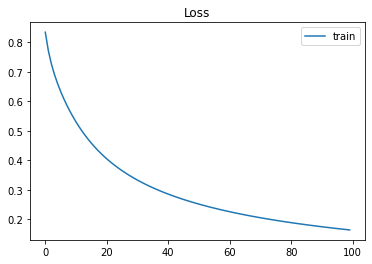

In [ ]:
train_model(net, optimizer, dloader_train, criterion)  #QUESTO è IL TRAINING

**Evaluation**

In [ ]:
def eval_model(model, data_loader):  #PRENDE IL MODELLO DA VALUTARE 
    model.eval() # Set model to eval mode
    true_preds, num_preds = 0., 0. #QUANTE PREDICTIONS TRUE E QUANTE FALSE

    with torch.no_grad(): # Deactivate gradients for the following code, NON TI SERVE PER IL VALIDATION 
        for data_inputs, data_labels in data_loader:

            # Determine prediction of model on dev set
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)  
            preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1 PRIMA AVEVAMO USATO BINARY CROSS COME LOSS, QUI DEVO PREDIRRE
            pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1, TUTTO CIO CHE è MAGGIORE DI 0.5 SARà 1, ALTRIMENTI 0

            # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]

    acc = true_preds / num_preds
    print("Accuracy of the model: %4.2f%%" % (100.0*acc))

In [ ]:
eval_model(net, dloader_test)

Accuracy of the model: 99.80%


**The XOR logic gate**

Let's create the XOR Dataset

In [ ]:
class XORDataset(Dataset):
  def __init__(self, num_samples = 5000):
    super().__init__()

    self.size = num_samples
    d = torch.randint(low = 0 , high = 2, size=(self.size,2), dtype=torch.float32) #qui self.size corrisponde a 5000 e 2 colonne, è la dimensione del tensor 5000,2
    l = (d.sum(dim=1) == 1).to(torch.float32)  # questo è il labels, in pratica se la somma è 1 mi ritorni true
    d += 0.1 * torch.randn(d.shape)  #aggiungo il bias
    self.data = d  #qui ho i dati
    self.label = l  #qui ho i label


  def __len__(self):
    # Number of data point we have.
    return self.size # len(self.data)


  def __getitem__(self, idx):
    # Return the idx-th data point of the dataset
    # If we have multiple things to return (data point and label), we can return them as tuple
    data_point = self.data[idx]
    data_label = self.label[idx]
    return data_point, data_label

In [ ]:
from operator import getitem
# dataset instantiation
xor_dataset = XORDataset(num_samples = 5000)
len(xor_dataset)



5000

The class torch.utils.data.DataLoader represents a Python iterable over a dataset. The data loader communicates with the dataset using the function getitem, and stacks its outputs as tensors over the first dimension to form a batch. In contrast to the dataset class, we usually don’t have to define our own data loader class, but can just create an object of it with the dataset as input. We can configure our data loader with the following input arguments:

- batch_size: number of samples to stack in a batch
- shuffle: if True, the data is returned in a random order. This is important during training for introducing stochasticity.
- drop_last: if True, the last batch is dropped in case it is smaller than the specified batch size. This occurs when the dataset size is not a multiple of the batch size.

In [ ]:
# Create two datasets for train and test
dset_train = XORDataset(num_samples = 5000)
dset_test = XORDataset(num_samples = 500)

# Create the DataLoaders
dloader_train = DataLoader(dset_train, batch_size = 50, shuffle=True)
dloader_test = DataLoader(dset_test, batch_size = 50)

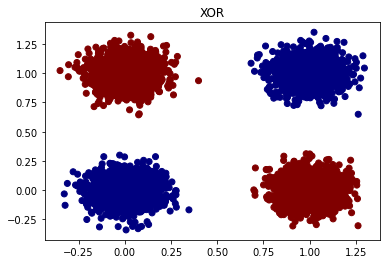

In [ ]:
# Plot the XOR dataset
plt.scatter(xor_dataset.data[:,0], xor_dataset.data[:,1], c = xor_dataset.label, cmap = "jet")
plt.title("XOR")
plt.show()

In [ ]:
class XORModel(nn.Module):  #the problem is not linear, we cannot find a line that split 2 classes
  # Constructor  SO WE ADD NON LINEARITY
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(XORModel, self).__init__()
    self.layer1 = torch.nn.Linear(in_features=input_dim, out_features=hidden_dim)  #1 layer is not enough looking at the plot, a line cannot solve the problem
    self.nnReLu = torch.nn.ReLU()  #this is the activaction function that apply the non linearity
    self.layer2 = torch.nn.Linear(in_features = hidden_dim, out_features= output_dim )
    
  # THE forward define all the information flows to the model
  def forward(self, x):
    x = self.layer1(x)  #the output of the 1 linear is the input of the activaction function
    x = self.nnReLu(x) # the output of the relu is the input of the second linear funct
    output = self.layer2(x)

    
    return output 

For the examples in this notebook, we will use a tiny neural network with two input neurons and four hidden neurons. As we perform binary classification, we will use a single output neuron. Note that we do not apply a sigmoid on the output yet. This is because other functions, especially the loss, are more efficient and precise to calculate on the original outputs instead of the sigmoid output. We will discuss the detailed reason later.

In [ ]:
# Create the model with 2 layers
net2 = XORModel(input_dim = 2,hidden_dim=4, output_dim = 1) # net contiene il modello
# nel nostro esempio abbiamo solo 1 neurone, ecco perche è sufficiente una sola rete con 2 input ed 1 output


In [ ]:
print(net2)


XORModel(
  (layer1): Linear(in_features=2, out_features=4, bias=True)
  (nnReLu): ReLU()
  (layer2): Linear(in_features=4, out_features=1, bias=True)
)


**The Optimizer**
For updating the parameters of the net, PyTorch provides the package torch.optim. For now we use the Stocasting Gradient Descent, that updates the parameters by multiplying the gradients with a small constant, called learning rate.

In [ ]:
import torch.optim as optim
optimizer = optim.SGD(net2.parameters(), lr = 0.01)

The optimizer provides us two very usefull functions:

optimizer.step() updates the model parameters (weights) based on the gradient values.
optimizer.zero_grad() sets the gradients of all paramters to zero.

**The Loss** 

For binary classification, we ca use the Binary Cross Entropy (BCE) Loss.

As BCE loss expects all inputs are in the range  [0,1]  , we will use BCEWithLogitsLoss, which first applies a sigmoid function to the inputs.

In [ ]:
# Define a loss function
criterion = nn.BCEWithLogitsLoss()

###Train the net

Epoch 1: TrL= 0.7563916236162186
Epoch 2: TrL= 0.7171477884054184
Epoch 3: TrL= 0.6945517176389694
Epoch 4: TrL= 0.6803359991312027
Epoch 5: TrL= 0.6706490182876587
Epoch 6: TrL= 0.661953791975975
Epoch 7: TrL= 0.6533831089735032
Epoch 8: TrL= 0.6445909762382507
Epoch 9: TrL= 0.6354481345415115
Epoch 10: TrL= 0.6259709680080414
Epoch 11: TrL= 0.6162190294265747
Epoch 12: TrL= 0.6061416238546371
Epoch 13: TrL= 0.5957659524679184
Epoch 14: TrL= 0.5851710915565491
Epoch 15: TrL= 0.574421012699604
Epoch 16: TrL= 0.5636154866218567
Epoch 17: TrL= 0.5528241190314293
Epoch 18: TrL= 0.5421694880723953
Epoch 19: TrL= 0.5316981822252274
Epoch 20: TrL= 0.5214786288142205
Epoch 21: TrL= 0.511639899611473
Epoch 22: TrL= 0.5021288108825683
Epoch 23: TrL= 0.4930696925520897
Epoch 24: TrL= 0.4844303187727928
Epoch 25: TrL= 0.47624830305576327
Epoch 26: TrL= 0.46855115532875063
Epoch 27: TrL= 0.4613119226694107
Epoch 28: TrL= 0.4545021480321884
Epoch 29: TrL= 0.4481180998682976
Epoch 30: TrL= 0.4421368

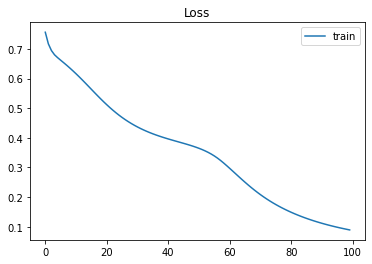

In [ ]:
train_model(net2, optimizer, dloader_train, criterion)

In [ ]:
# Evaluate the model
eval_model(net2, dloader_test)

Accuracy of the model: 100.00%
